In [1]:
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

api = wandb.Api()
run = api.run("/niket/cifar-analysis/runs/85qi69xt")

In [2]:
df = run.history()

In [3]:
df.head()

,_step,_runtime,train/LC,test/loss,lr,adv/acc,test/LC,train/loss,test/acc,l2_norm,train/acc,iter,_timestamp
0,0,23.257571,76.262299,2.302131,0.00001,0.0,75.734726,2.302278,0.110,211.008698,0.10928,1,1.747865e+09
1,1,52.113506,75.992477,2.301955,0.00001,0.0,75.411720,2.302113,0.115,211.009979,0.11466,2,1.747865e+09
2,2,86.643016,75.990639,2.301786,0.00001,0.0,75.604836,2.301948,0.120,211.011139,0.11906,3,1.747865e+09
3,3,121.134595,75.808037,2.301611,0.00001,0.0,75.655975,2.301768,0.128,211.012222,0.12342,4,1.747865e+09
4,4,155.776383,74.957344,2.301438,0.00001,0.0,75.436562,2.301591,0.132,211.013214,0.12760,5,1.747865e+09


In [4]:
sns.color_palette('deep6').as_hex()[2]

'#c44e52'

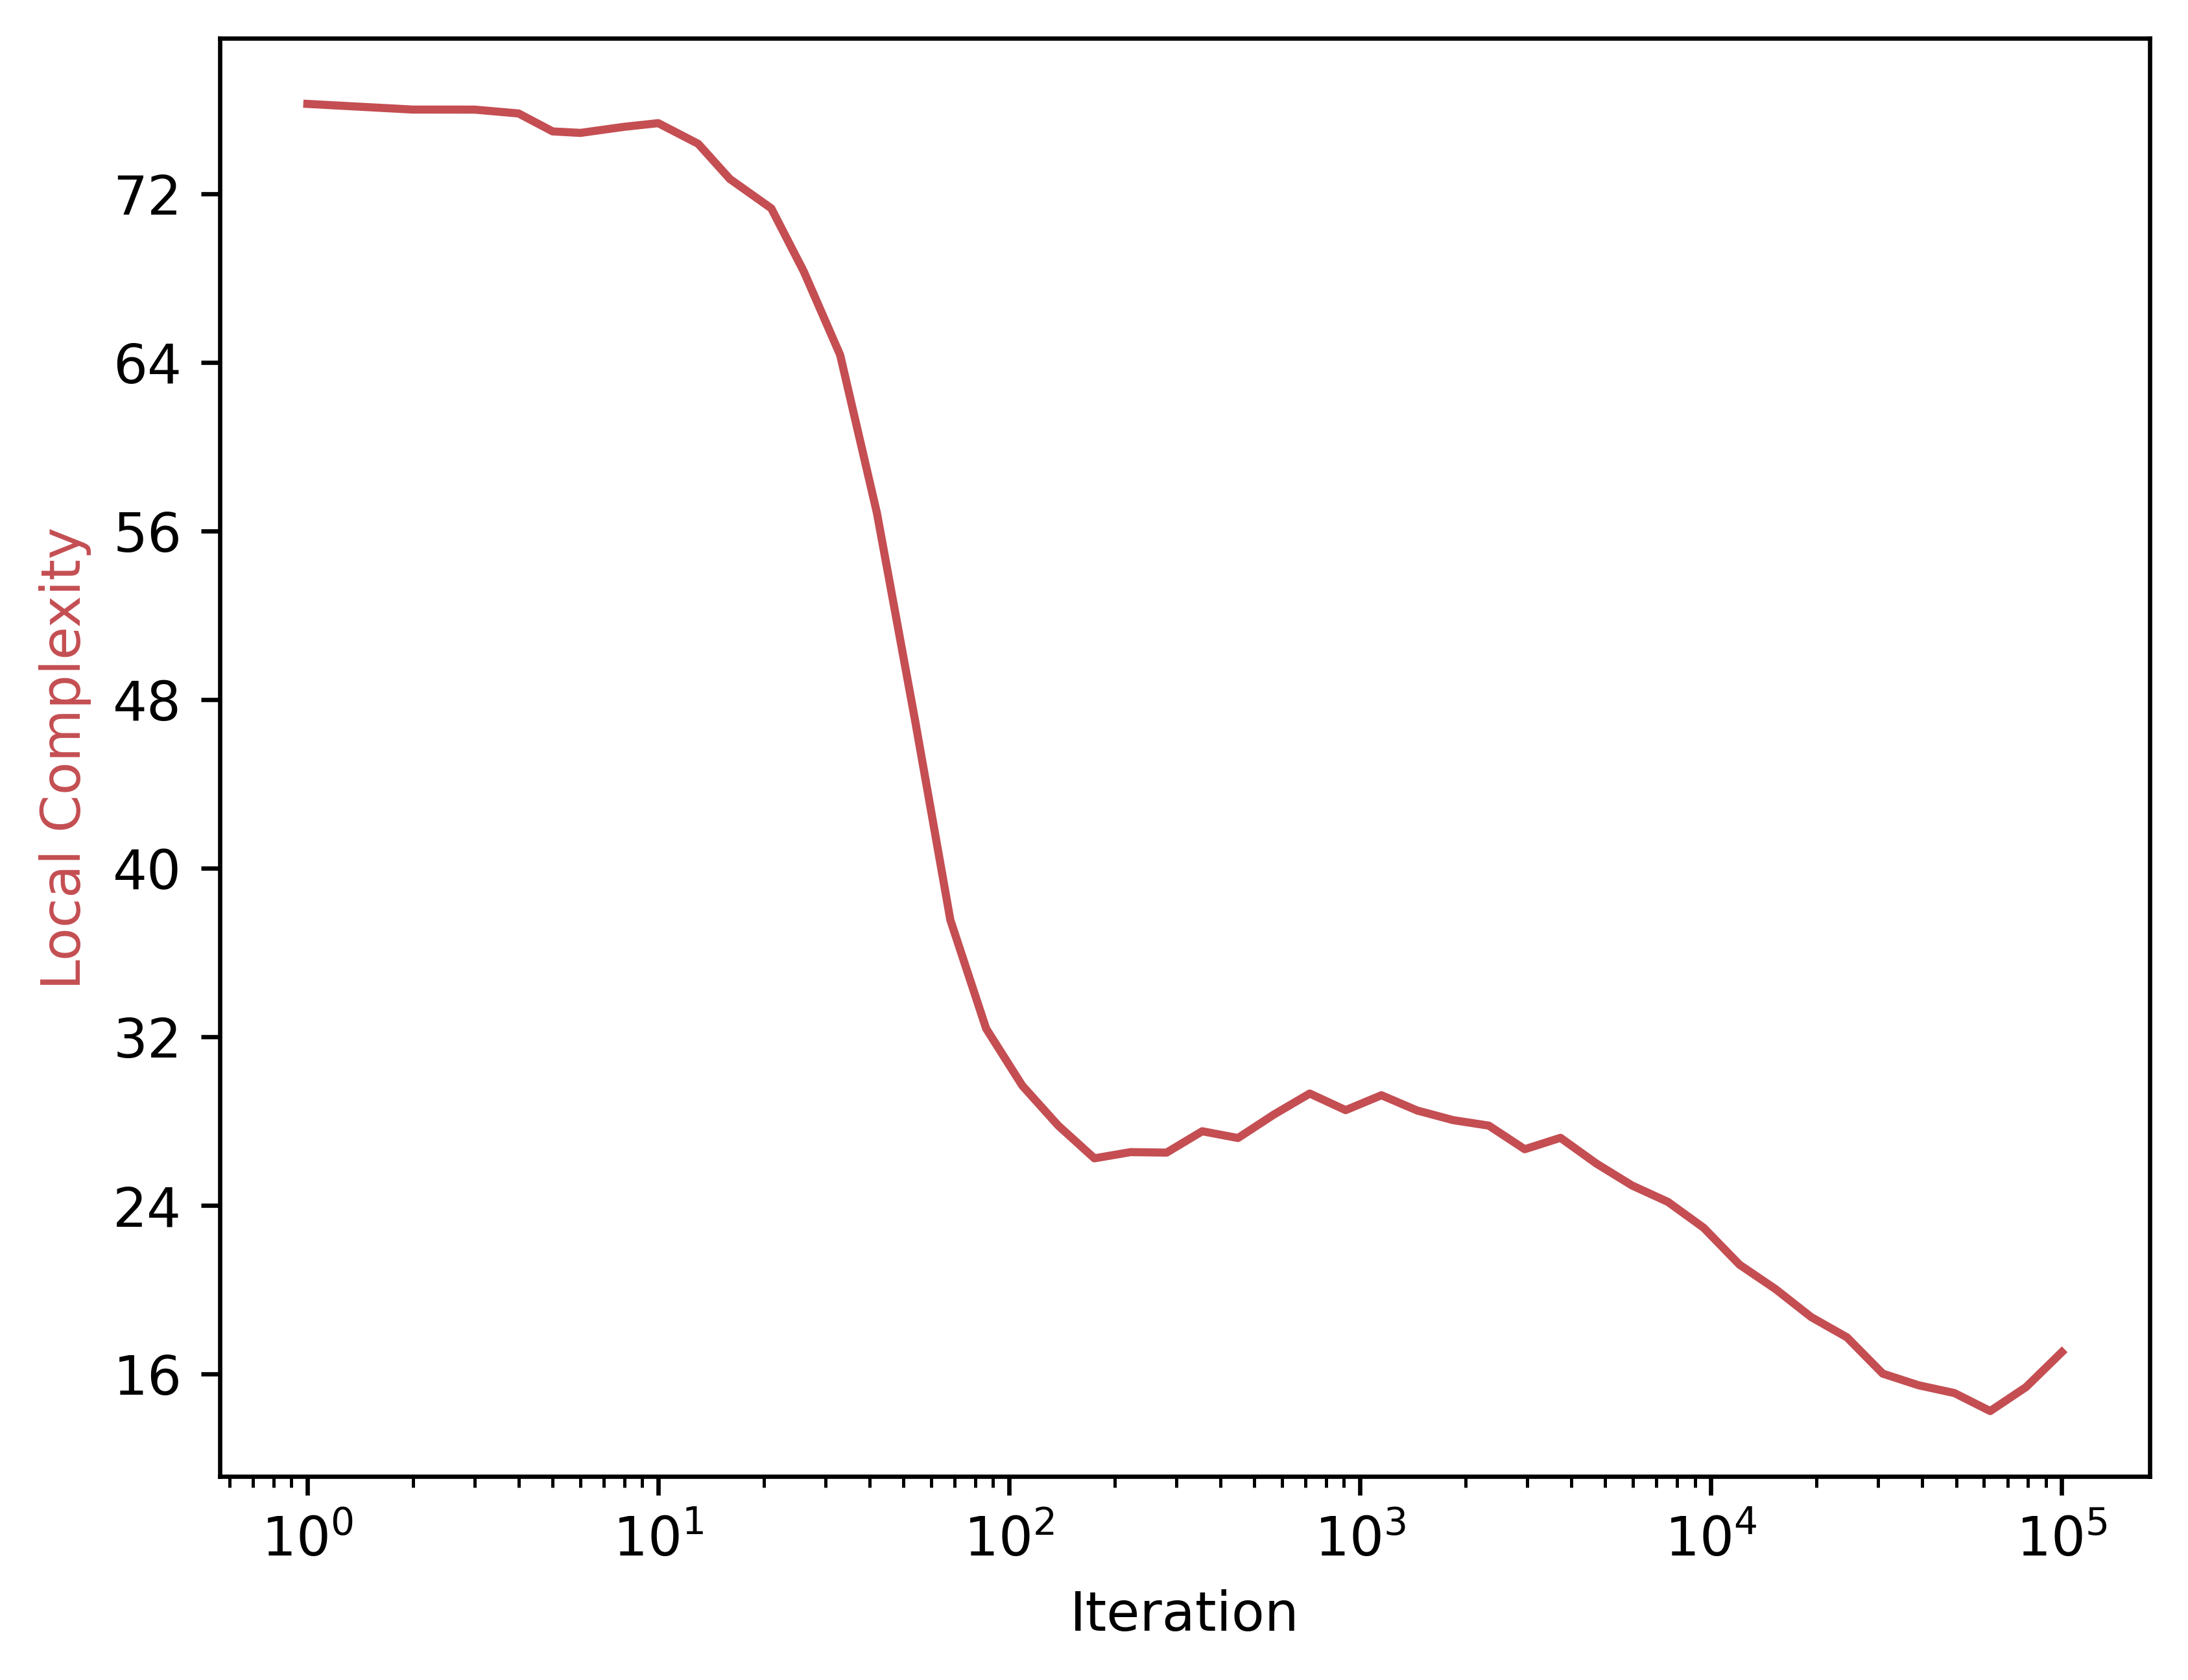

In [6]:
#sns.set_theme(style="white")

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot the train/LC data on the second y-axis
sns.lineplot(data=df, x='iter', y='train/LC', ax=ax1, color='#c44e52')

# Set the y-axis label for train/LC data
ax1.set_ylabel('Local Complexity', color='#c44e52')
# Set y-axis ticks for train/LC data to be integers
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the x-axis scale to log
ax1.set_xscale('log')

# Set the x-axis label
ax1.set_xlabel('Iteration')

# Set the figure DPI
fig.set_dpi(600)

# Set the aspect ratio of the whole figure
#fig.set_figheight(4)
#fig.set_figwidth(8)

# Render the figure
plt.show()

fig.savefig('output1mnist.png', bbox_inches='tight', dpi=600)

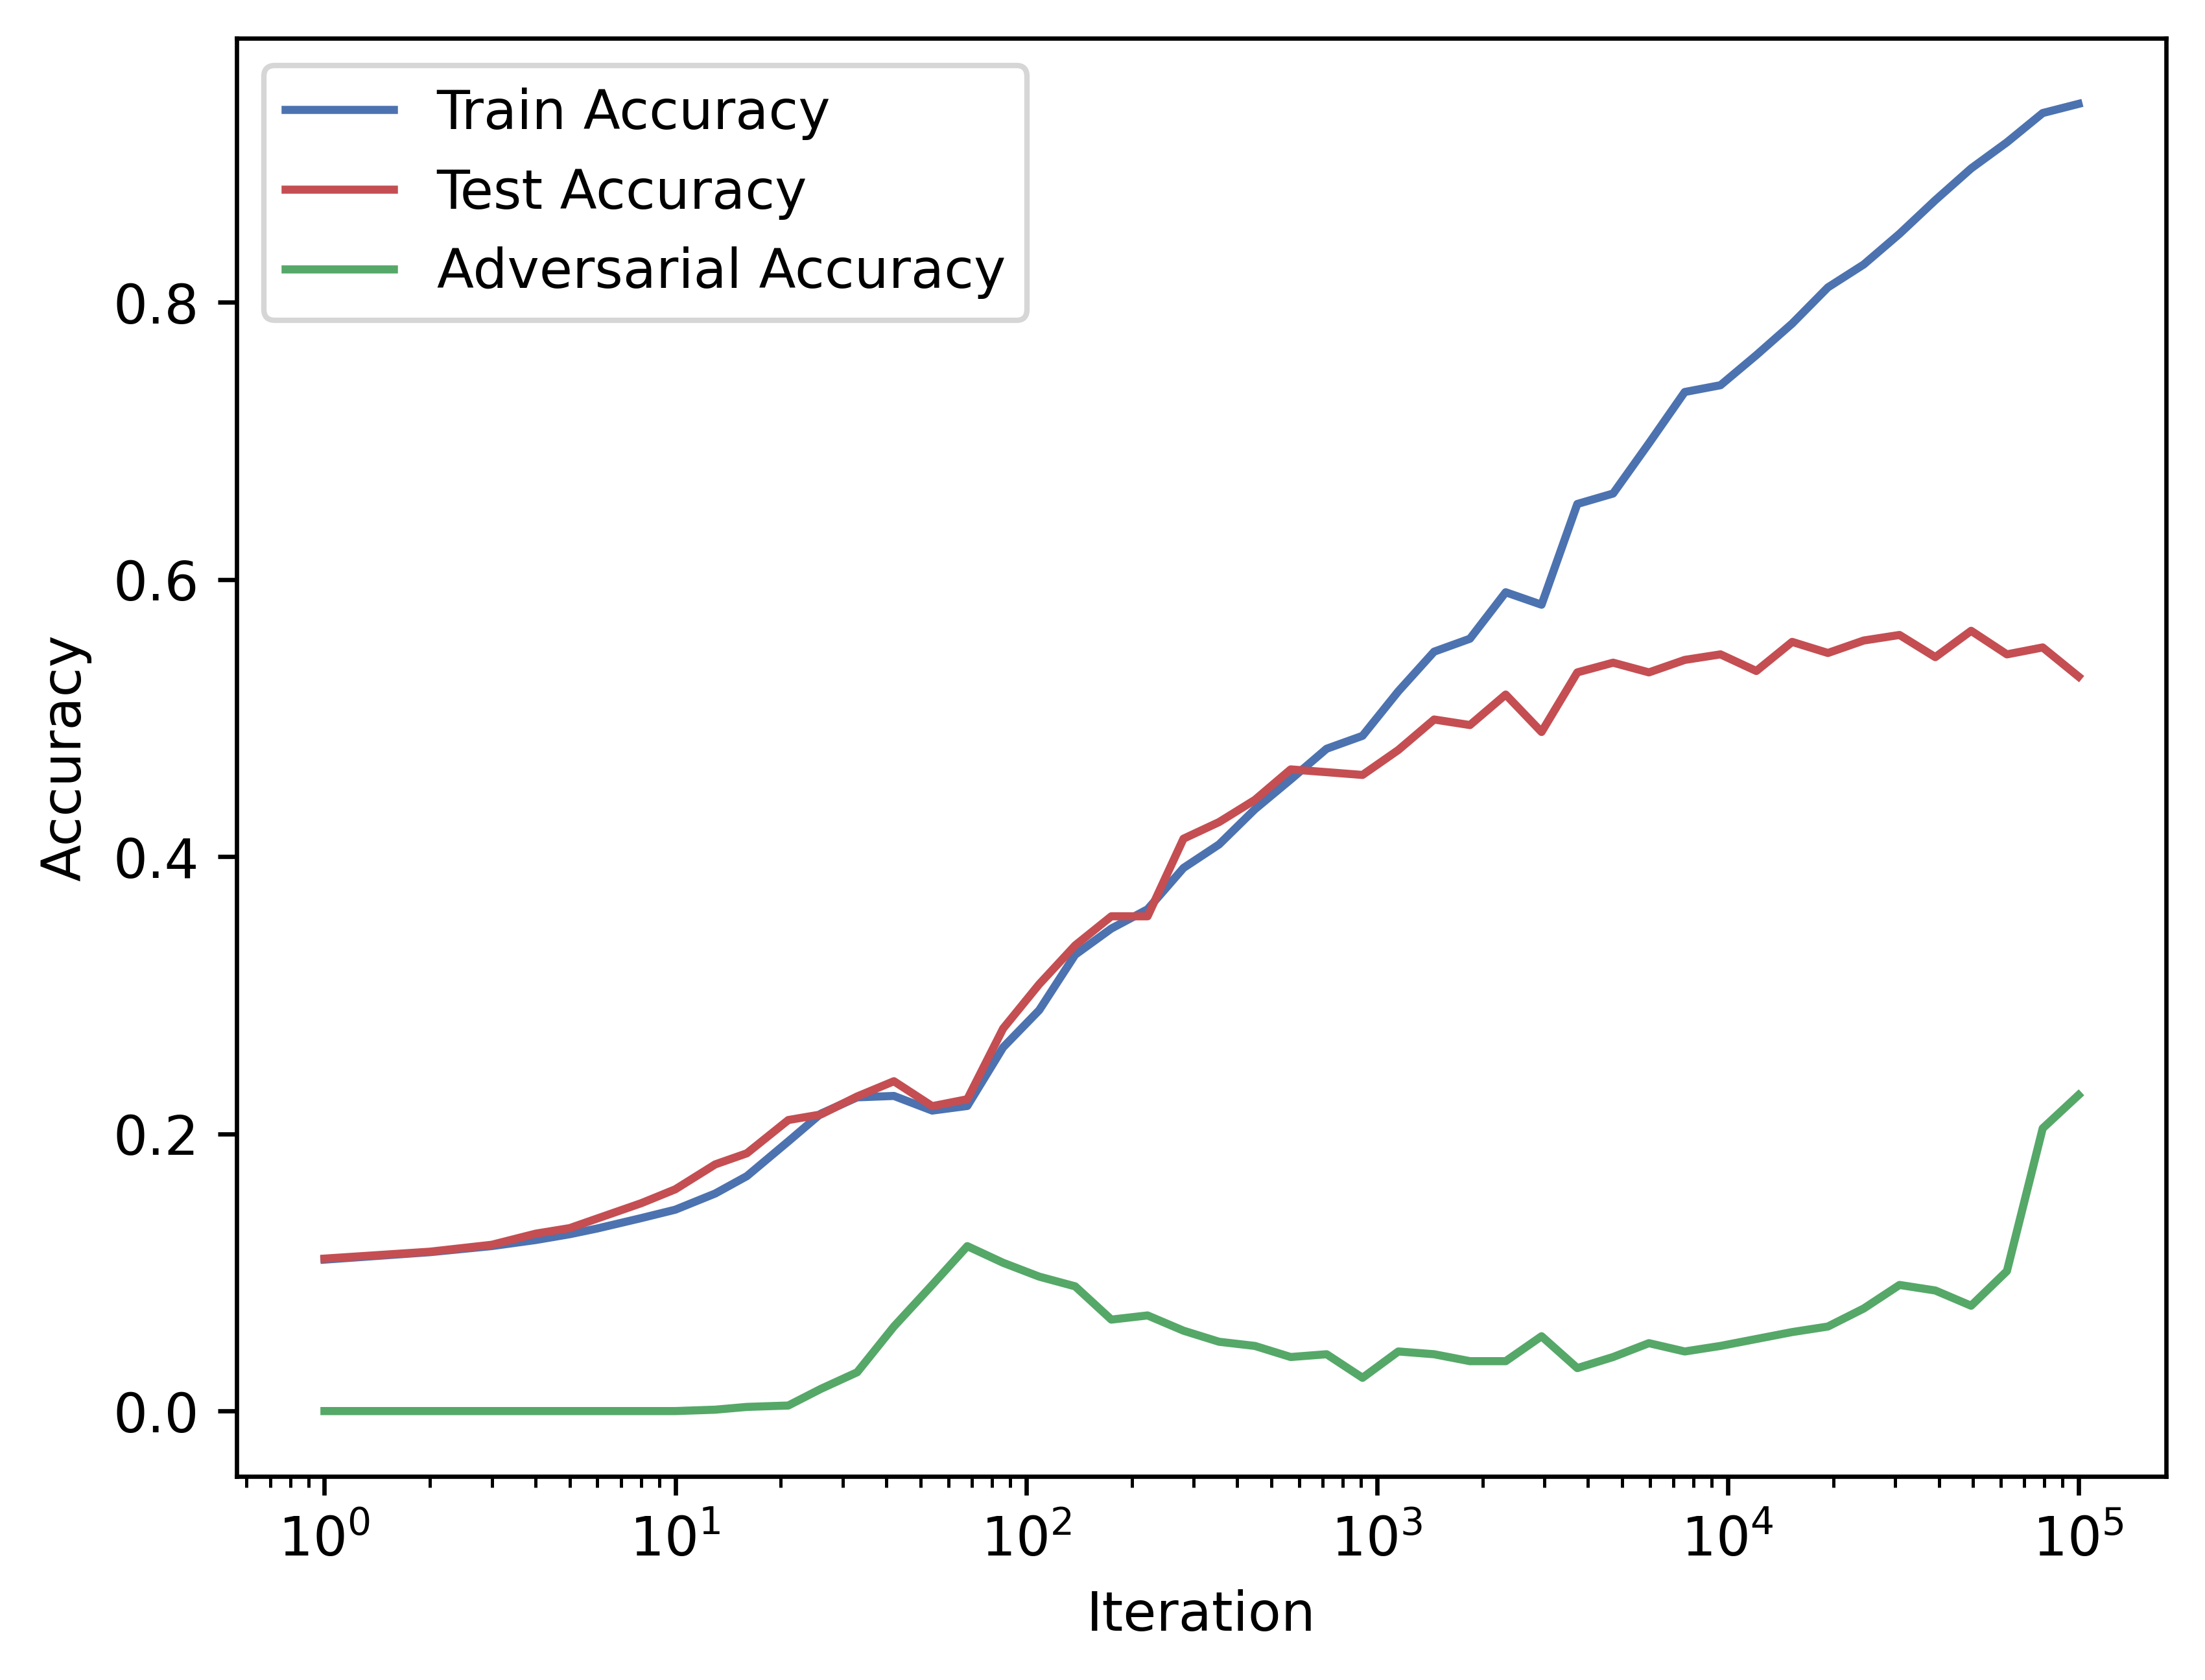

In [7]:
#sns.set_theme(style="white")

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the train/acc data on the axes
sns.lineplot(data=df, x='iter', y='train/acc', ax=ax, color='#4c72b0', label='Train Accuracy')

# Plot the test/acc data on the axes
sns.lineplot(data=df, x='iter', y='test/acc', ax=ax, color='#c44e52', label='Test Accuracy')

# Plot the adv/acc data on the axes
sns.lineplot(data=df, x='iter', y='adv/acc', ax=ax, color='#55a868', label='Adversarial Accuracy')

# Set the y-axis label
ax.set_ylabel('Accuracy')

# Set the x-axis scale to log
ax.set_xscale('log')

# Set the x-axis label
ax.set_xlabel('Iteration')

# Set the figure DPI
fig.set_dpi(600)

# Set the legend to be in the upper right
ax.legend(loc='upper left')

#ax.grid(axis='x')

# Render the figure
plt.show()

fig.savefig('output2mnist.png', bbox_inches='tight', dpi=600)

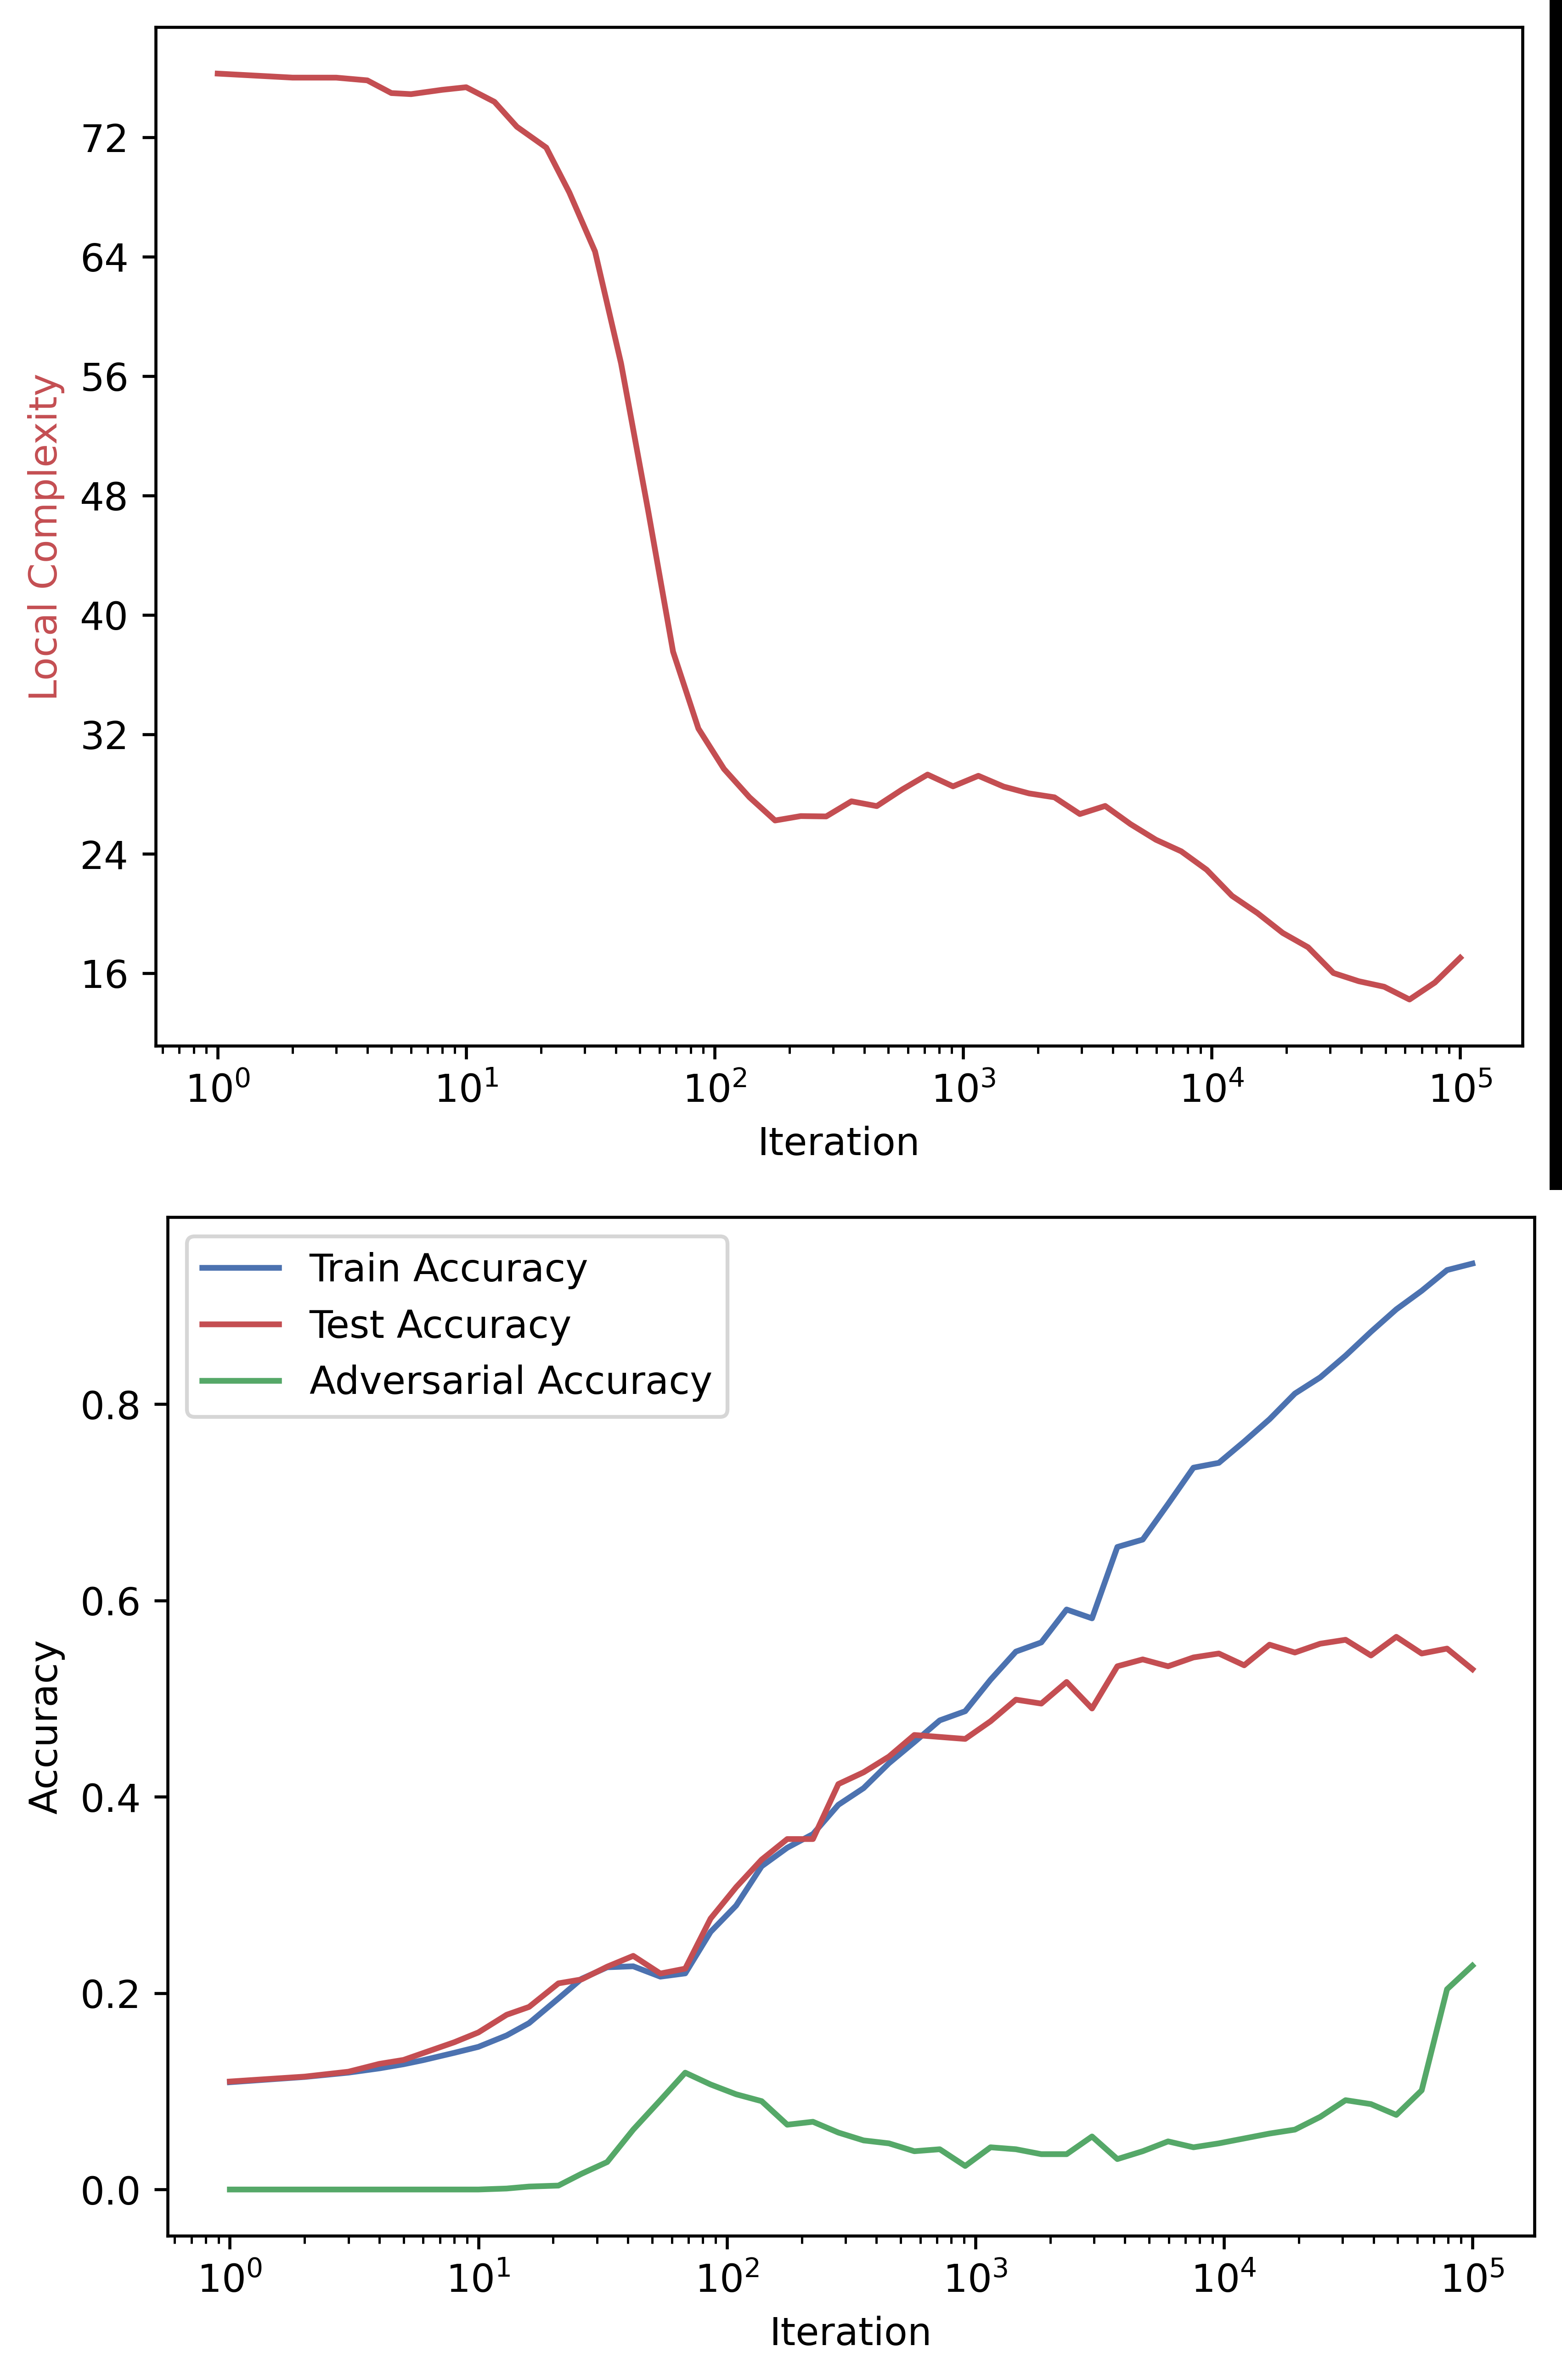

In [8]:
from PIL import Image

# Open the image files
image1 = Image.open('output1mnist.png')
image2 = Image.open('output2mnist.png')

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Calculate the total height of the stacked image
total_height = height1 + height2

# Create a new image with the width of the wider image and the total height
stacked_image = Image.new('RGB', (max(width1, width2), total_height))

# Paste the first image at the top
stacked_image.paste(image1, (0, 0))

# Paste the second image below the first image
stacked_image.paste(image2, (0, height1))

# Display the stacked image
stacked_image.show()



Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


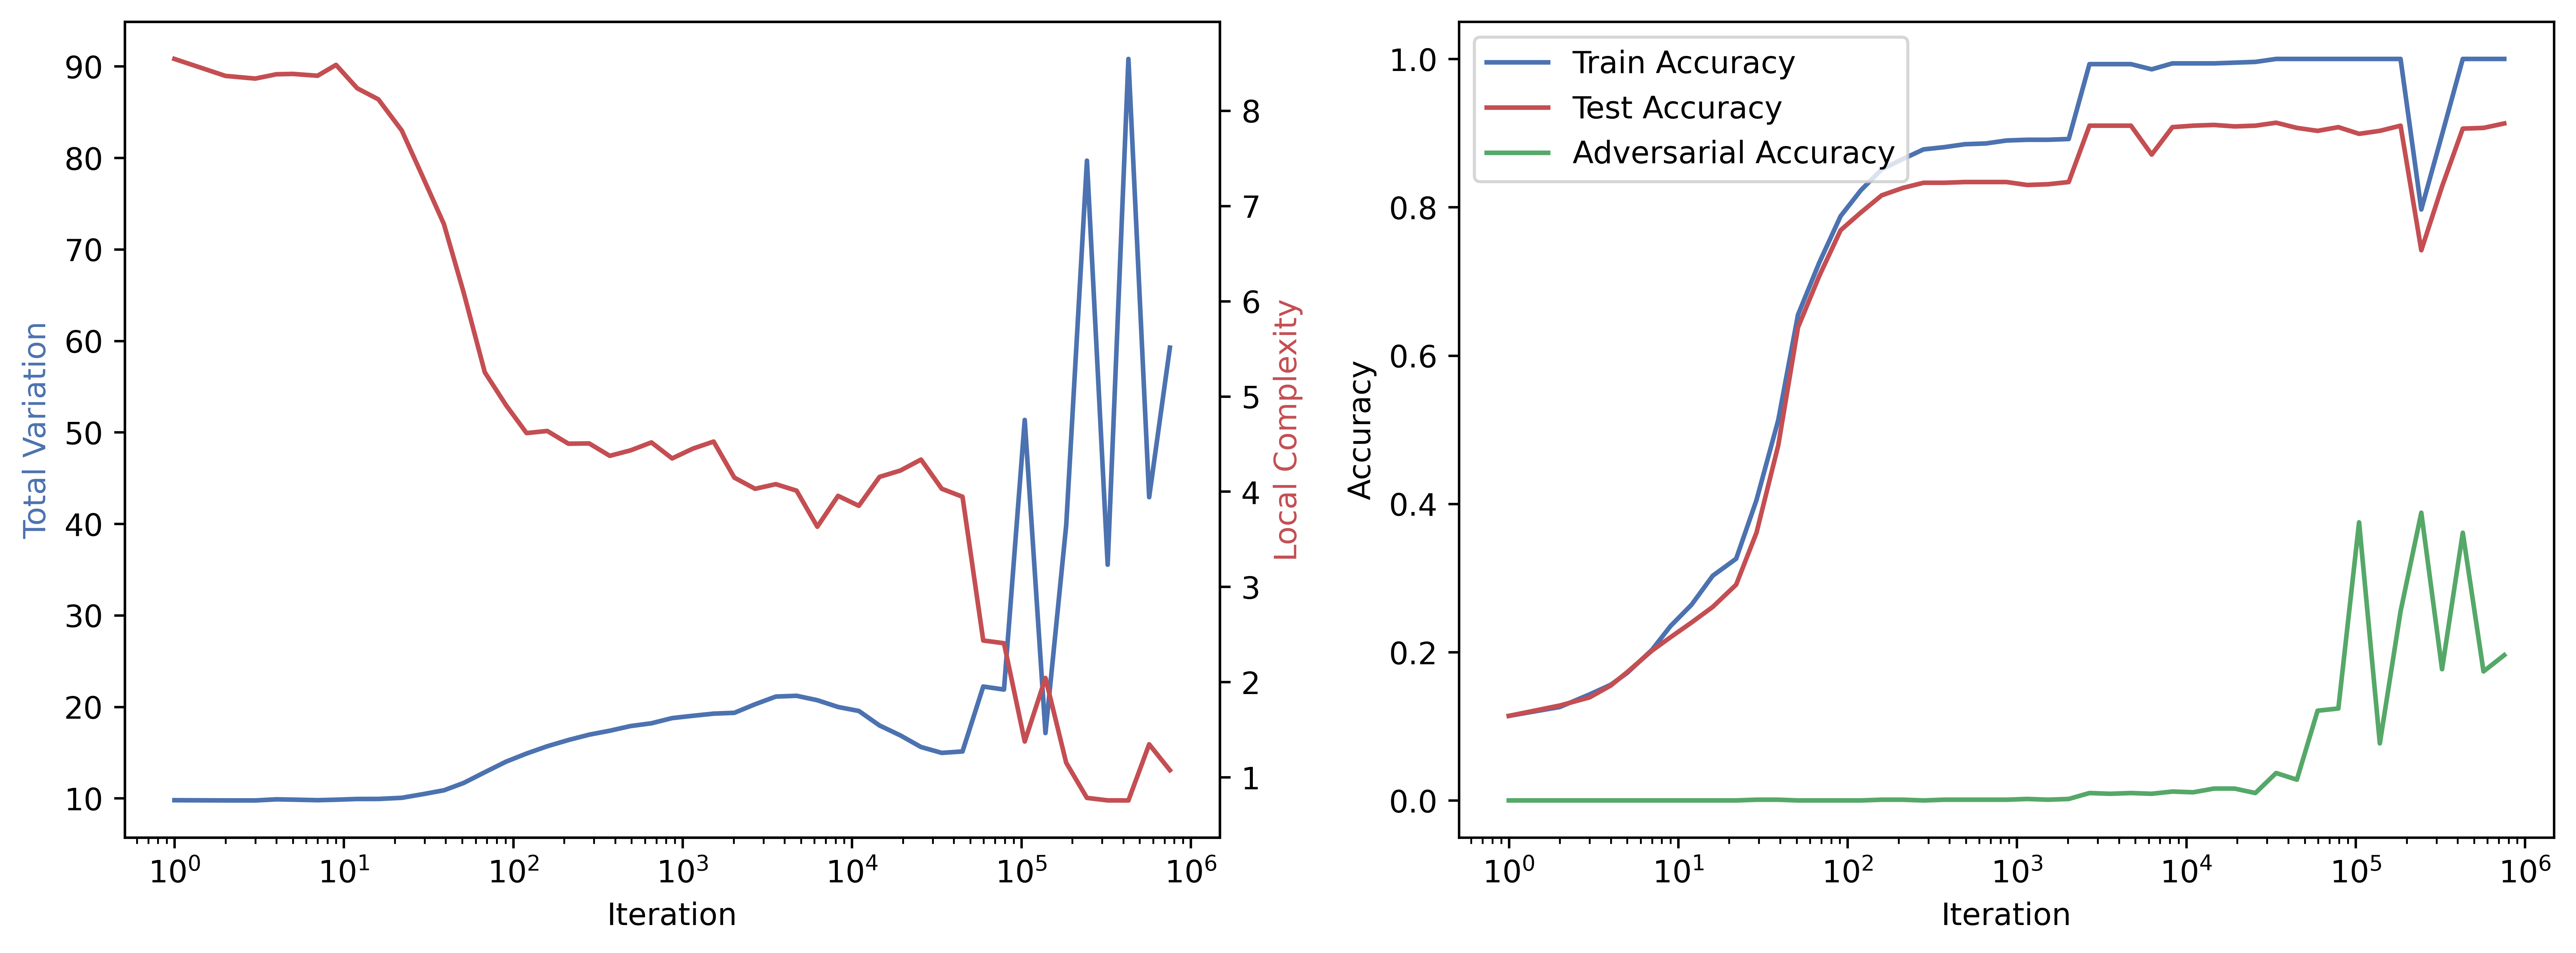

In [49]:
import numpy as np
from PIL import Image

# Open the image files
image1 = Image.open('output1mnist.png')
image2 = Image.open('output2mnist.png')

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Calculate the total width of the stacked image
total_width = width1 + width2

# Create a new image with the total width and the height of the taller image
stacked_image = Image.new('RGB', (total_width, max(height1, height2)))

# Paste the first image on the left
stacked_image.paste(image1, (0, 0))

# Paste the second image on the right
stacked_image.paste(image2, (width1, 0))

# Display the stacked image
stacked_image